# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [47]:
# import numpy and pandas
import numpy as np
import pandas as pd


# Challenge 1 - Index Functions

In this challenge, we will practice the advanced functions introduced in the lesson. However, before we start, we will load and evaluate our dataset.

In [27]:
# Run this code:

admissions = pd.read_csv('../Admission_Predict.csv')
#to remove trailing spaces at the end of the column names
admissions.columns = admissions.columns.str.rstrip()

Let's evaluate the dataset by looking at the `head` function.

In [3]:
# Your code here:

admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,316,104,3,3.0,3.5,8.00,1,0.72
2,3,322,110,3,3.5,2.5,8.67,1,0.80
3,4,314,103,2,2.0,3.0,8.21,0,0.65
4,5,330,115,5,4.5,3.0,9.34,1,0.90


Before beginning to work with this dataset and evaluating graduate admissions data, we will verify that there is no missing data in the dataset. Do this in the cell below.

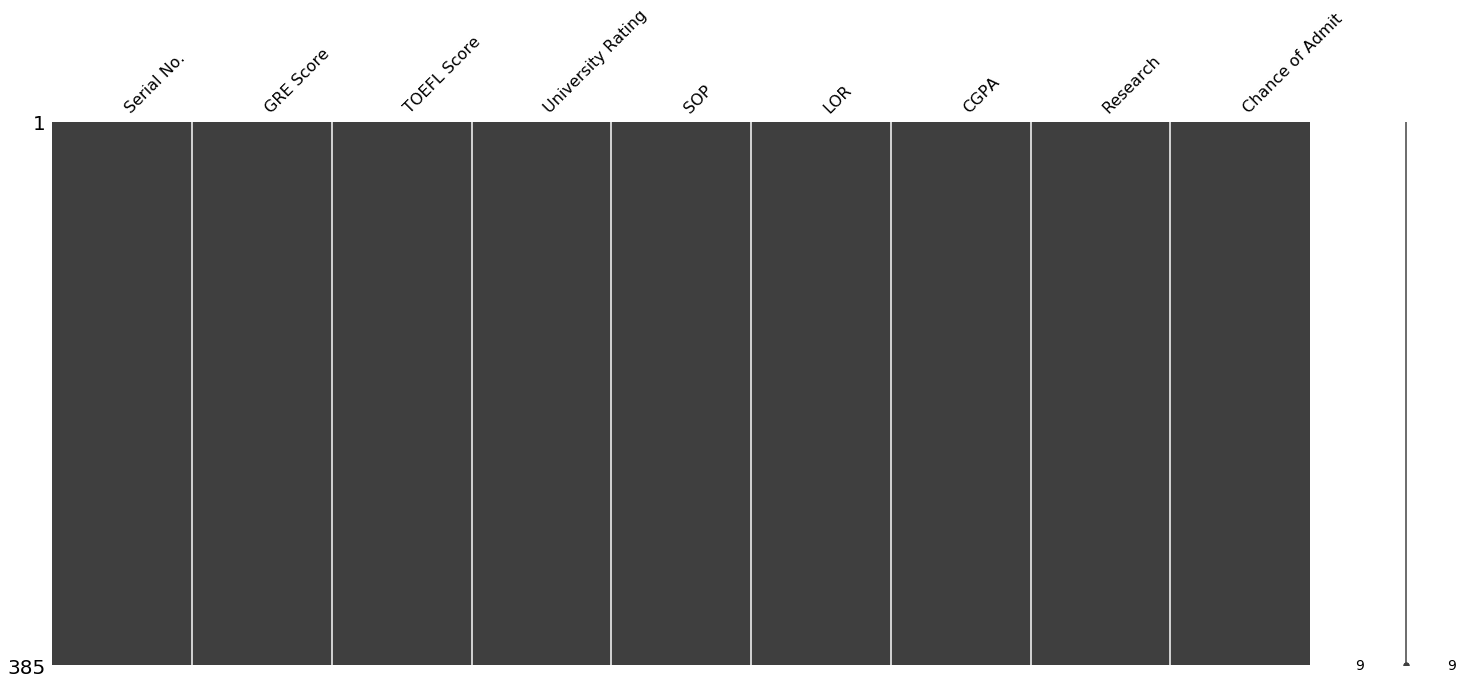

In [7]:
# Your code here:
#manera tradicional de hacerlo....
admissions.isnull().values.any()

#manera gráfica...
import missingno as msno
msno.matrix(admissions)

Interestingly, there is a column that uniquely identifies the applicants. This column is the serial number column. Instead of having our own index, we should make this column our index. Do this in the cell below. Keep the column in the dataframe in addition to making it an index.

In [11]:
# Your code here:
admissions.set_index('Serial No.')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
...,...,...,...,...,...,...,...,...
381,324,110,3,3.5,3.5,9.04,1,0.82
382,325,107,3,3.0,3.5,9.11,1,0.84
383,330,116,4,5.0,4.5,9.45,1,0.91


Turns out that `GRE Score` and `CGPA` also uniquely identify the data. Show this in the cell below.

In [13]:
# Your code here:

#admissions.columns
admissions[['GRE Score', 'CGPA']]

,GRE Score,CGPA
0,337,9.65
1,316,8.00
2,322,8.67
3,314,8.21
4,330,9.34
...,...,...
380,324,9.04
381,325,9.11
382,330,9.45
383,312,8.78


Replace the index with an index comprised of two columns - `GRE Score` and `CGPA`. Remove the columns from the dataset as well. Make sure to use `inplace=True`.

Now change the index back to a sequence starting at zero using the `reset_index` function. Make sure to use `inplace=True`.

In [17]:
# Your code here:
admissions['newindex']=admissions['GRE Score']+ admissions['CGPA']
admissions.drop(columns=['GRE Score','CGPA'], inplace=True)

Index(['Serial No.', 'TOEFL Score', 'University Rating', 'SOP', 'LOR',
       'Research', 'Chance of Admit', 'newindex'],
      dtype='object')

In [18]:
admissions.reset_index(inplace=True)

# Challenge 2 - Advanced Functions

In this part of the lab, we would like to test complex conditions on the entire dataset at once. Let's start by finding the number of rows where the CGPA is higher than 9 and the student has conducted research.

In [79]:
# Your code here:
#dtype(admissions)
admissions.query('CGPA >9 & Research==1')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,CGPA_std,GRE_std,LOR_std,deciding_column
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1.750174,1.755663,1.193197,1.755663
4,5,330,115,5,4.5,3.0,9.34,1,0.90,1.234884,1.149292,-0.481338,-0.481338
10,11,328,112,4,4.0,4.5,9.10,1,0.78,0.835949,0.976043,1.193197,0.835949
19,20,328,116,5,5.0,5.0,9.50,1,0.94,1.500840,0.976043,1.751376,1.500840
20,21,334,119,5,5.0,4.5,9.70,1,0.95,1.833285,1.495789,1.193197,1.833285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,329,111,4,4.5,4.0,9.23,1,0.89,1.052039,1.062667,0.635019,1.062667
380,381,324,110,3,3.5,3.5,9.04,1,0.82,0.736216,0.629546,0.076840,0.076840
381,382,325,107,3,3.0,3.5,9.11,1,0.84,0.852571,0.716170,0.076840,0.076840
382,383,330,116,4,5.0,4.5,9.45,1,0.91,1.417729,1.149292,1.193197,1.149292


Now return all the rows where the CGPA is greater than 9 and the SOP score is less than 3.5. Find the mean chance of admit for these applicants.

In [84]:
# Your code here:
query2=admissions.query('CGPA >9 & SOP<3.5')
np.mean(query2['Chance of Admit'])

0.8019999999999999

We would like to create a deciding factor column for each student. We standardize several columns and then pick the most important factor from a lookup table. If the standardized value is above 0.8, the student will be accepted.

We will start by creating a standardized column for `CGPA`, `GRE Score` and `LOR`. We will name these columns `CGPA_std`, `GRE_std`, and `LOR_std` respecively.

Recall that standardizing a column is done by subtracting the mean of the column from all observations in the column and then dividing each observation in the column by the column's standard deviation.

In the cell below, write a standardization function (a function that takes a column as input and returns a standardized column as output). Make sure to use the `numpy` versions of mean and standard deviation.

In [56]:
def standardize(col):
    # This function takes a column from a dataframe and returns a standardized column by subtracting the column's mean
    # and dividing by the column's standard deviation.
    return((col-np.mean(col))/np.std(col))
    # Your code here:

Now create the standardized columns `CGPA_std`, `GRE_std`, and `LOR_std` and add them to the `admissions` dataframe.

In [63]:
# Your code here:
admissions['CGPA_std']=standardize(admissions.CGPA)
admissions['GRE_std']=standardize(admissions['GRE Score'])
admissions['LOR_std']=standardize(admissions.LOR)

We will generate the decision choice at random using the code below. Please run the cell.

In [67]:
# Run this code:

from random import choices
std_columns = ['CGPA_std', 'GRE_std', 'LOR_std']

decision_choice = choices(std_columns, k=admissions.shape[0])

Now create the deciding column using the `lookup` function. The lookup column is `decision_choice` found above. Call the column resulting from the lookup function `deciding_column` and add it to the `admissions` dataframe.

In [78]:
# Your code here:
#admissions.columns
admissions['deciding_column']=admissions.lookup(admissions.index,decision_choice)
admissions['deciding_column'].head()

0    1.755663
1   -0.992501
2    0.456297
3   -0.481338
4   -0.481338
Name: deciding_column, dtype: float64

Create a column called `decision` in the `admissions` dataframe. Assign 1 to this column if the value of `deciding_column` is greater than 0.8 and 0 otherwise.

In [92]:
# Your code here:
admissions['decision']= admissions.deciding_column
admissions['decision']= np.where(admissions['deciding_column']>0.8,1,0)
print(admissions.decision)

0      1
1      0
2      0
3      0
4      0
      ..
380    0
381    0
382    1
383    0
384    0
Name: decision, Length: 385, dtype: int64


How many applicants will be accepted to the program using the decision column? Compute the result below.

In [100]:
# Your code here:
admissions['decision'].value_counts()
# 85

0    300
1     85
Name: decision, dtype: int64

# Challenge 3 - Method Chaining

To increase our coding efficiency, let's make a number of changes to our dataframe in one line of code.

In the cell below, remove all non character symbols from the column names, replace all spaces in column names to underscores, and change all upper case characters to lower case. Assign these new column values to `admissions.columns`.

In [104]:
# Your code here:
admissions = admissions.rename(columns = {'GRE Score':'gre_score', 'CGPA':'cgpa', 'TOEFL Score':'toefl_score',
'University Rating':'university_rating', 'SOP':'sop', 'LOR':'lor',
'Research':'research', 'Chance of Admit':'chance_of_admit', 'CGPA_std':'cgpa_std',
'GRE_std':'gre_std', 'LOR_std':'lor_std'})
admissions.columns

Index(['Serial No.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance_of_admit', 'cgpa_std', 'gre_std',
       'lor_std', 'deciding_column', 'decision'],
      dtype='object')

In the cell below, give all student with a university rating of 4 or higher a 10 point boost on their GRE score and split the column into 4 bins using the `cut` function. Assign this new score to the variable `adjusted_gre`.

In [106]:
# Your code here:
score= admissions[admissions['university_rating'] > 4]['gre_score']+10
adjusted_gre = pd.cut(list(score),4)
adjusted_gre


[(331.5, 340.75], (331.5, 340.75], (340.75, 350.0], (340.75, 350.0], (331.5, 340.75], ..., (340.75, 350.0], (331.5, 340.75], (331.5, 340.75], (340.75, 350.0], (340.75, 350.0]]
Length: 57
Categories (4, interval[float64]): [(312.963, 322.25] < (322.25, 331.5] < (331.5, 340.75] < (340.75, 350.0]]